In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [2]:
data = pd.read_csv('applications data.csv')

In [4]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20170101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20170101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20170101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20170101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20170101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [3]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [4]:
print(mem_usage(data))

244.69 MB


In [5]:
data.shape

(1000000, 10)

In [5]:
# no scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.00,1000000.00,1000000.00,1000000,1000000,1000000,1000000.00,1000000.00,1000000.00,1000000.00
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.50,20170667.78,508341536.81,NaN,NaN,NaN,50073.33,19517248.66,5368715638.23,0.01
std,288675.28,344.99,293486376.96,NaN,NaN,NaN,28915.92,356887.20,3082160504.84,0.12
min,1.00,20170101.00,36.00,NaN,NaN,NaN,2.00,19000101.00,593799.00,0.00
25%,250000.75,20170402.00,254217569.50,NaN,NaN,NaN,24992.00,19160922.00,2677134300.00,0.00
50%,500000.50,20170702.00,508814417.50,NaN,NaN,NaN,50492.00,19500901.00,5399909831.00,0.00
75%,750000.25,20171001.00,763092366.00,NaN,NaN,NaN,74496.00,19830316.00,8109241334.00,0.00


In [11]:
# see number of unique values in each field
data.nunique()

record         1000000
date               365
ssn             835819
firstname        78136
lastname        177001
address         828774
zip5             26370
dob              42673
homephone        28244
fraud_label          2
dtype: int64

In [13]:
data.drop(columns=['record']).mode()

,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,20170816,999999999,EAMSTRMT,ERJSAXA,123 MAIN ST,68138,19070626,9999999999,0


In [15]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [66]:
# change data type for columns date and dob
data['date'] = pd.to_datetime(data['date'],format='%Y%m%d')
data['dob'] = pd.to_datetime(data['dob'],format='%Y%m%d')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27,3749451123,0


In [31]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob            datetime64[ns]
homephone               int64
fraud_label             int64
dtype: object

In [16]:
data['fraud_label'].sum()

14393

In [17]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [32]:
numrecords = len(data)
print(numrecords)

1000000


In [19]:
print(len(goods))

985607


In [20]:
print(len(bads))

14393


In [21]:
print(len(goods) + len(bads))

1000000


In [33]:
# group by date
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2017-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2017-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2017-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2017-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2017-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2017-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2017-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2017-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2017-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


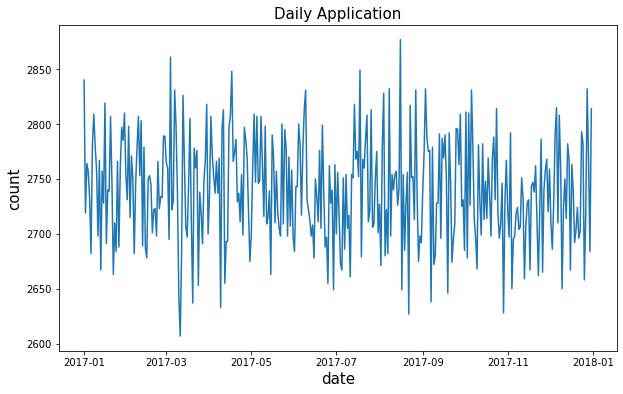

In [69]:
# plot number of records by date
plt.figure(figsize = (10,6))
plt.plot(count_day['record'])
plt.xlabel('date', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Daily Application', fontsize = 15)
plt.savefig('date.jpg')

In [16]:
# select top 20 dob
dob = data['dob'].value_counts().head(20)
dob

1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
2009-01-27       280
1946-09-01       135
1959-12-08       126
1928-06-11       120
1967-02-15       102
1936-09-08        81
2001-09-04        69
1957-06-30        69
2015-10-12        67
2002-03-15        65
1986-04-25        56
1955-10-13        55
1929-09-21        54
1940-03-01        52
1924-04-09        52
Name: dob, dtype: int64

In [17]:
dob_index = np.array(dob.index.strftime("%Y-%m-%d")) #change timestamp to string
dob_index

array(['1907-06-26', '1964-03-18', '1976-06-25', '1988-06-28',
       '1974-02-16', '2009-01-27', '1946-09-01', '1959-12-08',
       '1928-06-11', '1967-02-15', '1936-09-08', '2001-09-04',
       '1957-06-30', '2015-10-12', '2002-03-15', '1986-04-25',
       '1955-10-13', '1929-09-21', '1940-03-01', '1924-04-09'],
      dtype=object)

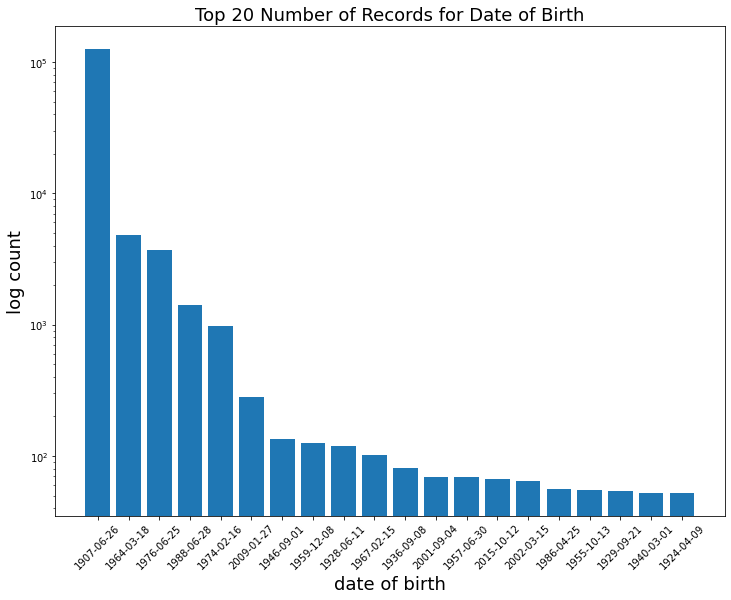

In [38]:
# plot dob with top 20 counts
plt.figure(figsize = (12,9))
plt.bar(dob_index, dob)
plt.xticks(rotation=45) # change the direction of xticks
plt.semilogy() # log y for base 10
plt.xlabel('date of birth', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Top 20 Number of Records for Date of Birth', fontsize = 18)
plt.savefig('dob.jpg')

In [38]:
# SSN
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: ssn, Length: 835819, dtype: int64

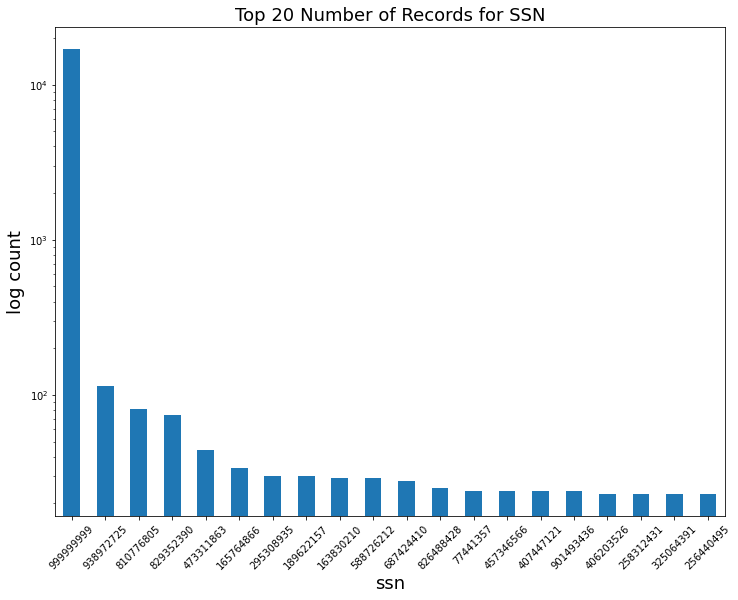

In [3]:
# plot for ssn
plt.figure(figsize = (12,9))
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)
plt.xlabel('ssn', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Top 20 Number of Records for SSN', fontsize = 18)
plt.xticks(rotation = 45)
plt.savefig('ssn.jpg')

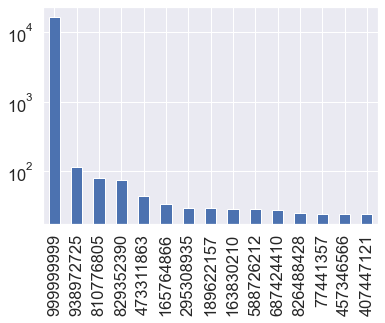

In [40]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [7]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,20170101,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,20170101,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,20170101,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,20170101,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,20170101,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,20170101,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,20170101,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,20170101,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,20170101,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,20170101,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [4]:
# delete SSN=999999999
data1 = data.copy(deep = True)
data1.loc[data1['ssn'] == 999999999, 'ssn'] = data1.loc[data1['ssn'] == 999999999, 'record'] 

In [9]:
len(data1[data1['ssn'] == 999999999])

0

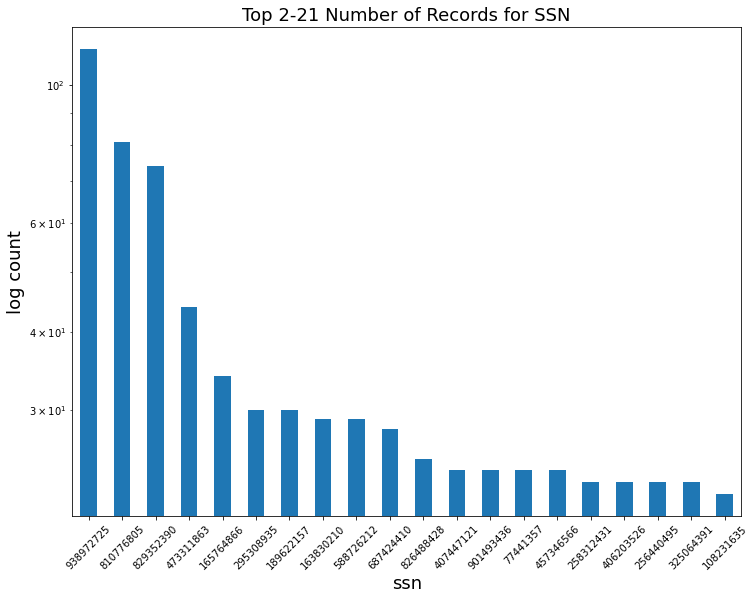

In [5]:
#plot Top 2-21 Number of Records for SSN
plt.figure(figsize = (12,9))
data1['ssn'].value_counts().head(20).plot(kind='bar',logy=True)
plt.xlabel('ssn', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Top 2-21 Number of Records for SSN', fontsize = 18)
plt.xticks(rotation = 45)
plt.savefig('ssn.jpg')

In [49]:
# firstname
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: firstname, Length: 78136, dtype: int64

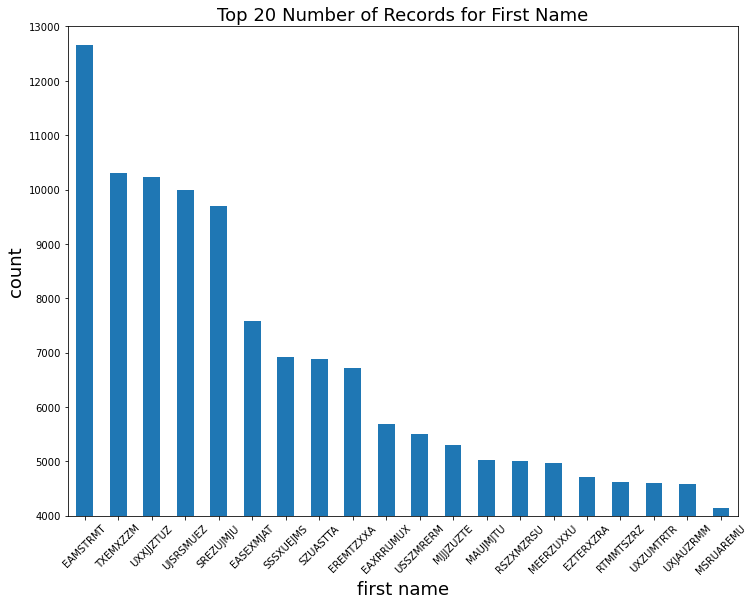

In [102]:
# plot Top 20 Number of Records for First Name
plt.figure(figsize=(12,9))
data['firstname'].value_counts().head(20).plot(kind='bar')
plt.xlabel('first name', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.title('Top 20 Number of Records for First Name', fontsize = 18)
plt.xticks(rotation = 45)
plt.ylim(4000,13000)
plt.savefig('firstname.jpg')

In [53]:
#lastname
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: lastname, Length: 177001, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'ERJSAXA'),
  Text(1, 0, 'UMXUUUSE'),
  Text(2, 0, 'UMARRMA'),
  Text(3, 0, 'MEAXJUX'),
  Text(4, 0, 'XMERRR'),
  Text(5, 0, 'SXZXJRJT'),
  Text(6, 0, 'EUSEZRAE'),
  Text(7, 0, 'USMATTUR'),
  Text(8, 0, 'ETERUXME'),
  Text(9, 0, 'RJURSTXJ'),
  Text(10, 0, 'RTZRTZAS'),
  Text(11, 0, 'SRTRERMJ'),
  Text(12, 0, 'RMRXAMX'),
  Text(13, 0, 'RJRARJJU'),
  Text(14, 0, 'SUERZXAT'),
  Text(15, 0, 'EUXRMR'),
  Text(16, 0, 'STXAAZZM'),
  Text(17, 0, 'ETAJXSRE'),
  Text(18, 0, 'EASASTEM'),
  Text(19, 0, 'SMTTZJJX')])

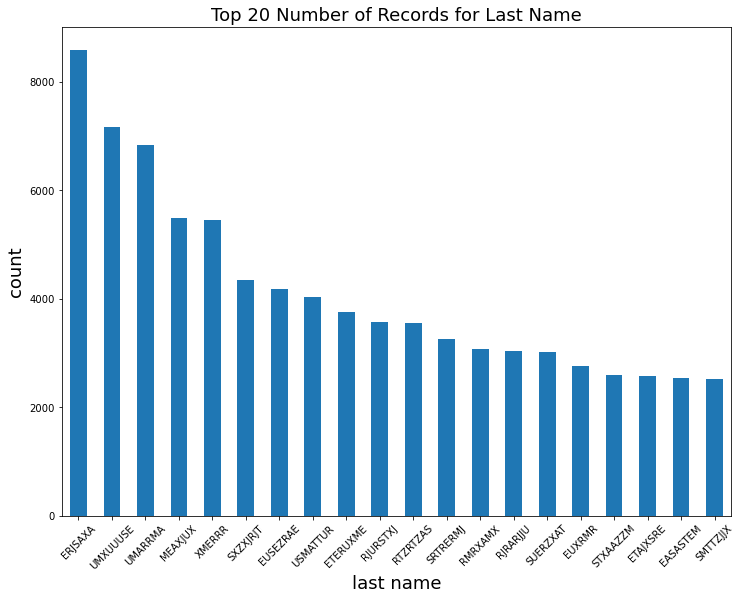

In [148]:
# plot 
plt.figure(figsize=(12,9))
data['lastname'].value_counts().head(20).plot(kind='bar')
plt.xlabel('last name', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.title('Top 20 Number of Records for Last Name', fontsize = 18)
plt.xticks(rotation = 45)
plt.ylim(2000,9000)
plt.savefig('lastname.jpg')

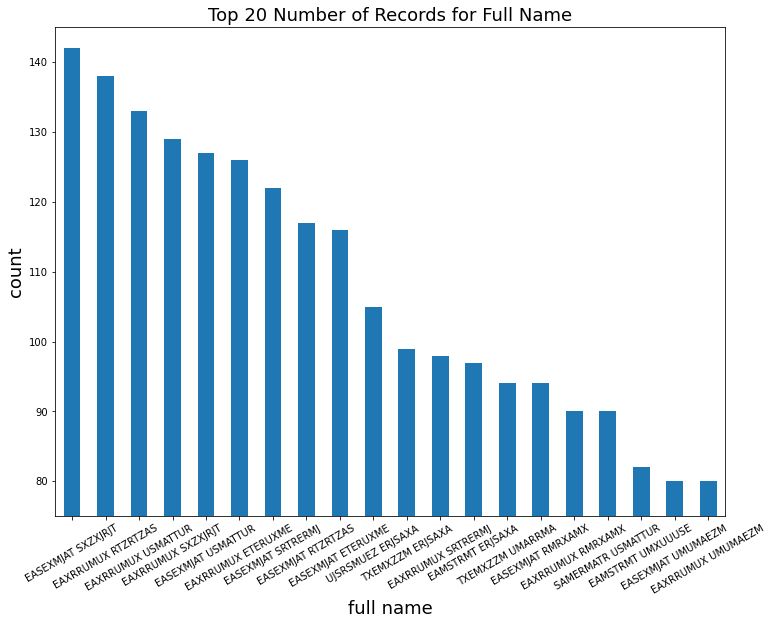

In [188]:
# full name
data4 = data.copy(deep = True)
data4['fullname'] = data4['firstname'].astype(str) + ' ' + data4['lastname'].astype(str)
plt.figure(figsize=(12,9))
data4['fullname'].value_counts().head(20).plot(kind='bar')
plt.xlabel('full name', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.title('Top 20 Number of Records for Full Name', fontsize = 18)
plt.xticks(rotation = 30)
plt.ylim(75,145)
plt.savefig('fullname.jpg', bbox_inches = 'tight') # save the entire figure

In [76]:
# address
data['address'].value_counts()

123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: address, Length: 828774, dtype: int64

In [3]:
# delete 123 main st
data2 = data.copy(deep = True) # deep copy so that further changes in data2 will not affect data
data2.loc[data2['address'] == '123 MAIN ST', 'address'] = data2.loc[data2['address'] == '123 MAIN ST', 'record']

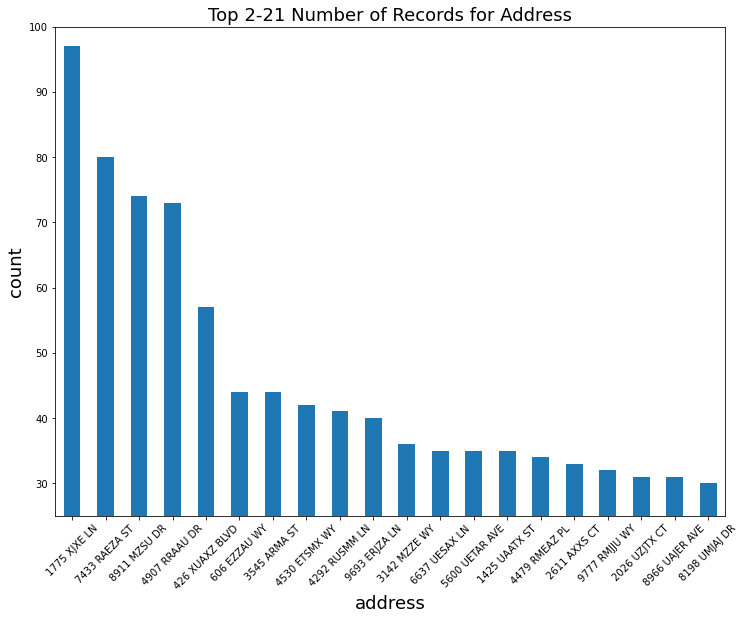

In [189]:
# plot with out first one
plt.figure(figsize=(12,9))
data2['address'].value_counts().head(20).plot(kind='bar')
plt.xlabel('address', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.title('Top 2-21 Number of Records for Address', fontsize = 18)
plt.xticks(rotation = 45)
plt.ylim(25,100)
plt.savefig('address.jpg',bbox_inches = 'tight')

In [59]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2017-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2017-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2017-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2017-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2017-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2017-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2017-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2017-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2017-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2017-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [69]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: zip5, Length: 26370, dtype: int64

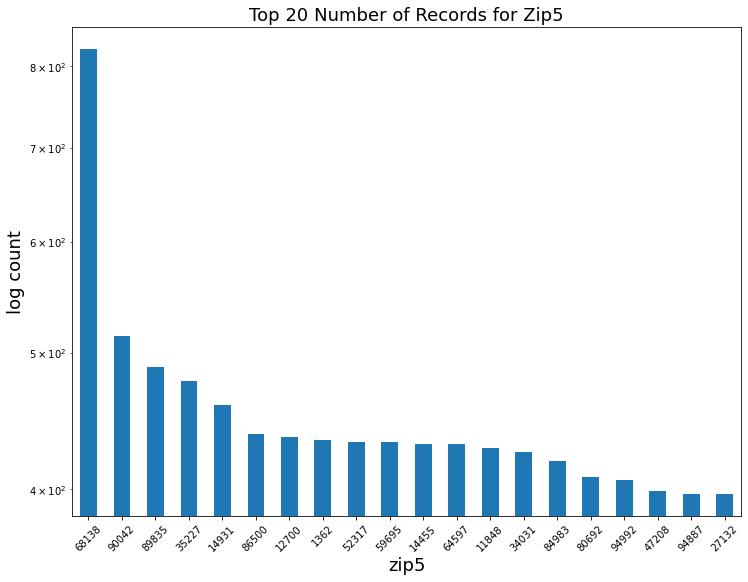

In [7]:
# plot zip5
plt.figure(figsize=(12,9))
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)
plt.xlabel('zip5', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Top 20 Number of Records for Zip5', fontsize = 18)
plt.xticks(rotation = 45)
plt.savefig('zip5.jpg', bbox_inches = 'tight')

In [77]:
data['fulladdress'] = data['address'].astype(str) + ' ' + data['zip5'].astype(str)
# data = data.drop(columns = ['zip5', 'address'])

In [80]:
data['fulladdress'].value_counts().head(20)

123 MAIN ST 68138       688
8911 MZSU DR 43516       74
4292 RUSMM LN 77157      41
6637 UESAX LN 44371      35
3253 EMMZX LN 38212      30
7651 RRMTE WY 52283      30
1693 RJTTT CT 57463      30
7017 SJJUZ WY 19288      29
4922 XUSXR LN 94848      27
5696 REUUU AVE 85902     27
7714 USXMM WY 95962      27
6546 MJMJ DR 1961        26
363 SMRUT DR 60311       26
6749 EXRZJ LN 69426      26
7665 ZXMS LN 48222       25
2826 EAEES AVE 62326     25
8076 UXAAZ WY 4762       24
8 RZSMS ST 63240         24
3247 UTUR LN 4915        24
9301 XRZX AVE 66171      23
Name: fulladdress, dtype: int64

<AxesSubplot:>

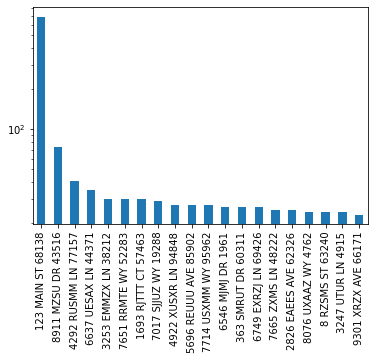

In [78]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [4]:
data2['fulladdress'] = data2['address'].astype('str') + ' ' + data2['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

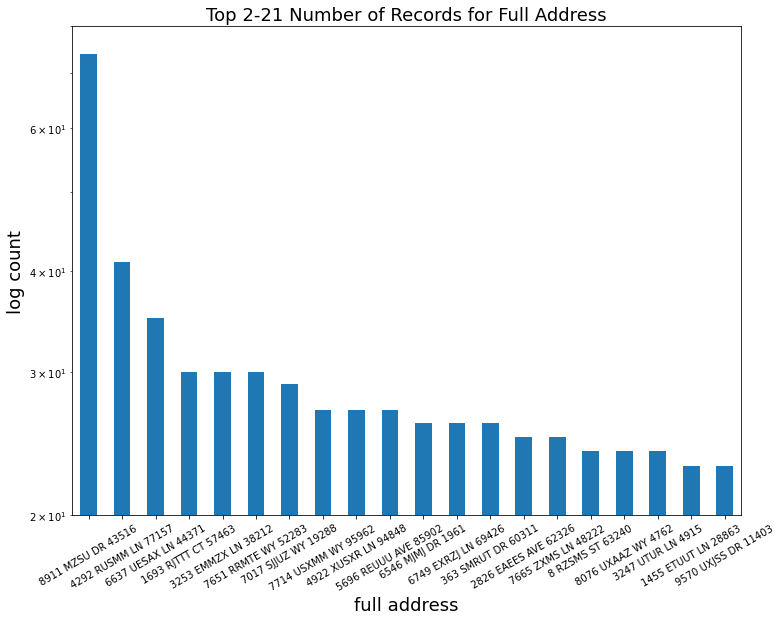

In [5]:
# plot full address without the first one
plt.figure(figsize=(12,9))
data2['fulladdress'].value_counts().head(20).plot(kind='bar',logy = True)
plt.xlabel('full address', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Top 2-21 Number of Records for Full Address', fontsize = 18)
plt.xticks(rotation = 30)
plt.ylim(20,80)
plt.savefig('fulladdress.jpg', bbox_inches = 'tight')

In [81]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

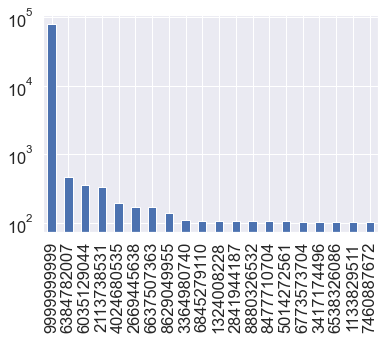

In [82]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [83]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0,5719 UEZJT PL 51486
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0,9323 STRMS PL 51395
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0,5317 UTXME ST 37840
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,65,9999999999,0,6393 UEJEA LN 41640
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0,5795 UMUTM BLVD 45077
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0,2249 XXAU DR 27375
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0,8314 XXMX DR 398
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,180,9999999999,0,8413 URUEU WY 15746
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0,9762 SXJXM LN 41694
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,201,9999999999,0,372 SXTEA DR 42716


In [84]:
len(data[data['homephone'] == 9999999999])

78512

In [114]:
data3 = data.copy(deep = True)
data3.loc[data3['homephone'] == 9999999999, 'homephone'] = data3.loc[data3['homephone'] == 9999999999, 'record']

In [115]:
len(data3[data3['homephone'] == 9999999999])

0

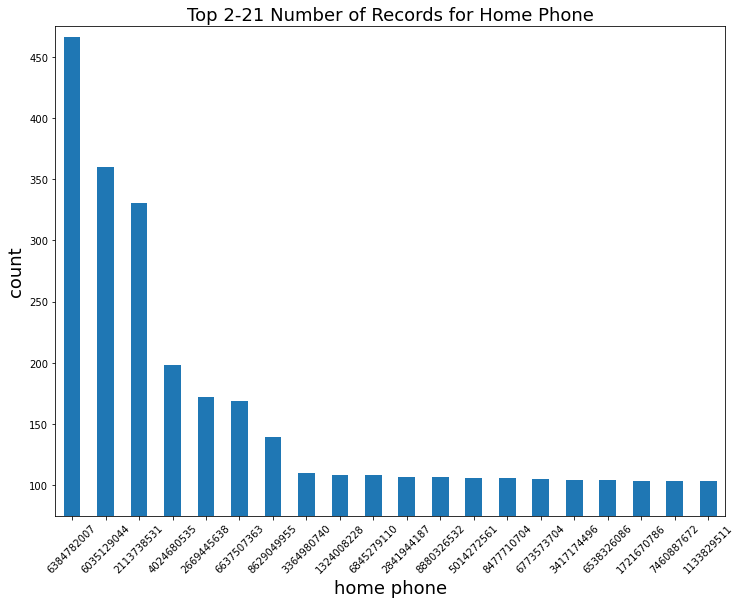

In [126]:
# plot
plt.figure(figsize=(12,9))
data3['homephone'].value_counts().head(20).plot(kind='bar')
plt.xlabel('home phone', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.title('Top 2-21 Number of Records for Home Phone', fontsize = 18)
plt.xticks(rotation = 45)
plt.ylim(75,475)
plt.savefig('homephone.jpg')

In [129]:
data['fraud_label'].value_counts()

0    985607
1     14393
Name: fraud_label, dtype: int64

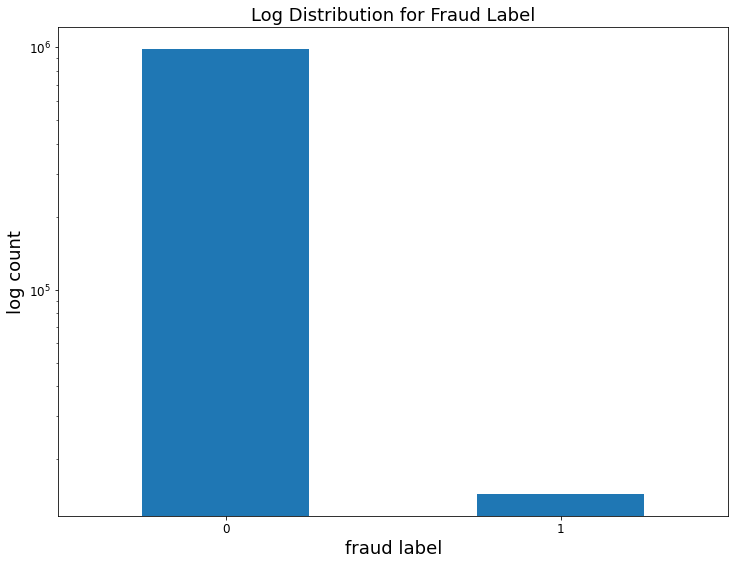

In [146]:
plt.figure(figsize=(12,9))
data['fraud_label'].value_counts().plot(kind = 'bar', logy = True)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('fraud label', fontsize = 18)
plt.ylabel('log count', fontsize = 18)
plt.title('Log Distribution for Fraud Label', fontsize = 18)
plt.savefig('label.jpg')

In [89]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [90]:
data.shape

(1000000, 10)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  int64         
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 76.3+ MB


In [92]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,4.914150e+08,50073.333143,1.716682e+07,4.583635e+09,0.014393
std,288675.278933,2.934649e+08,28915.921546,6.353070e+06,3.076022e+09,0.119104
min,1.000000,1.100000e+01,2.000000,1.000000e+00,1.800000e+01,0.000000
25%,250000.750000,2.370395e+08,24992.000000,1.916092e+07,1.857659e+09,0.000000
50%,500000.500000,4.916291e+08,50492.000000,1.950090e+07,4.544521e+09,0.000000
75%,750000.250000,7.457676e+08,74496.000000,1.983032e+07,7.254188e+09,0.000000
max,1000000.000000,9.999999e+08,99999.000000,2.016103e+07,9.999318e+09,1.000000


In [93]:
# data.to_csv('applications clean.csv', index = False)

In [94]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:20.233737
